In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakePulse, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse


In [ ]:

pulse_maker = MakePulse(N=128*10, Delta_f=1)

central_f = np.array([0.3])
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0.5, 0, 100, 50]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.1]))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))

input_pulses = pulse_maker.pulses



# central_f = np.array([0.3])
# phase = PolynomialPhase(central_frequency=central_f, coefficients = np.array([0, 0, -250]))
# amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.05]))
# _, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


# delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "shg", cross_correlation=True,
#                                                           gate=(frequency_gate, pulse_f_gate), real_fields=False, interpolate_fft_conform=True,
#                                                           N=128*2, scale_time_range=1.5, plot_stuff=True, cut_off_val=0.0001)#, frequency_range=(0.1,1.4))

In [30]:
time_inp

array([-639.75      , -639.25019531, -638.75039062, ...,  638.25058594,
        638.75039062,  639.25019531], shape=(2560,))

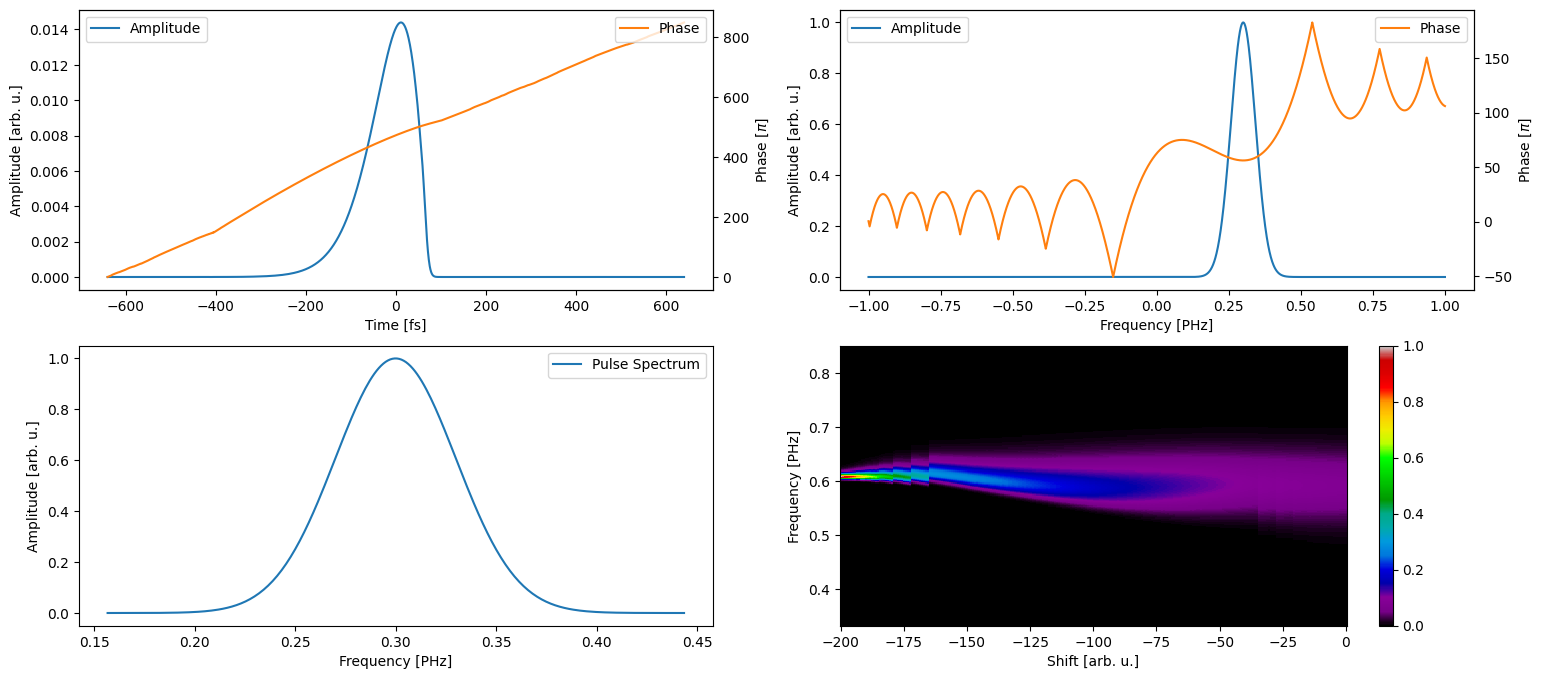

In [32]:
z_arr = jnp.linspace(-100,100,256)-100

z_arr, frequency_trace, trace, spectra = pulse_maker.generate_chirpscan(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "shg", 
                                                                        z_arr, "taylor", (2, 0.3), real_fields=False, 
                                                                        frequency_range=None, N=256, cut_off_val=0.001, plot_stuff=True)

In [3]:
from src.frog import Vanilla, LSGPA, CPCGPA, GeneralizedProjection, PtychographicIterativeEngine, COPRA

Doubleblind Retrieval has uniqueness issues. You should provide spectra for pulse and gate-pulse.


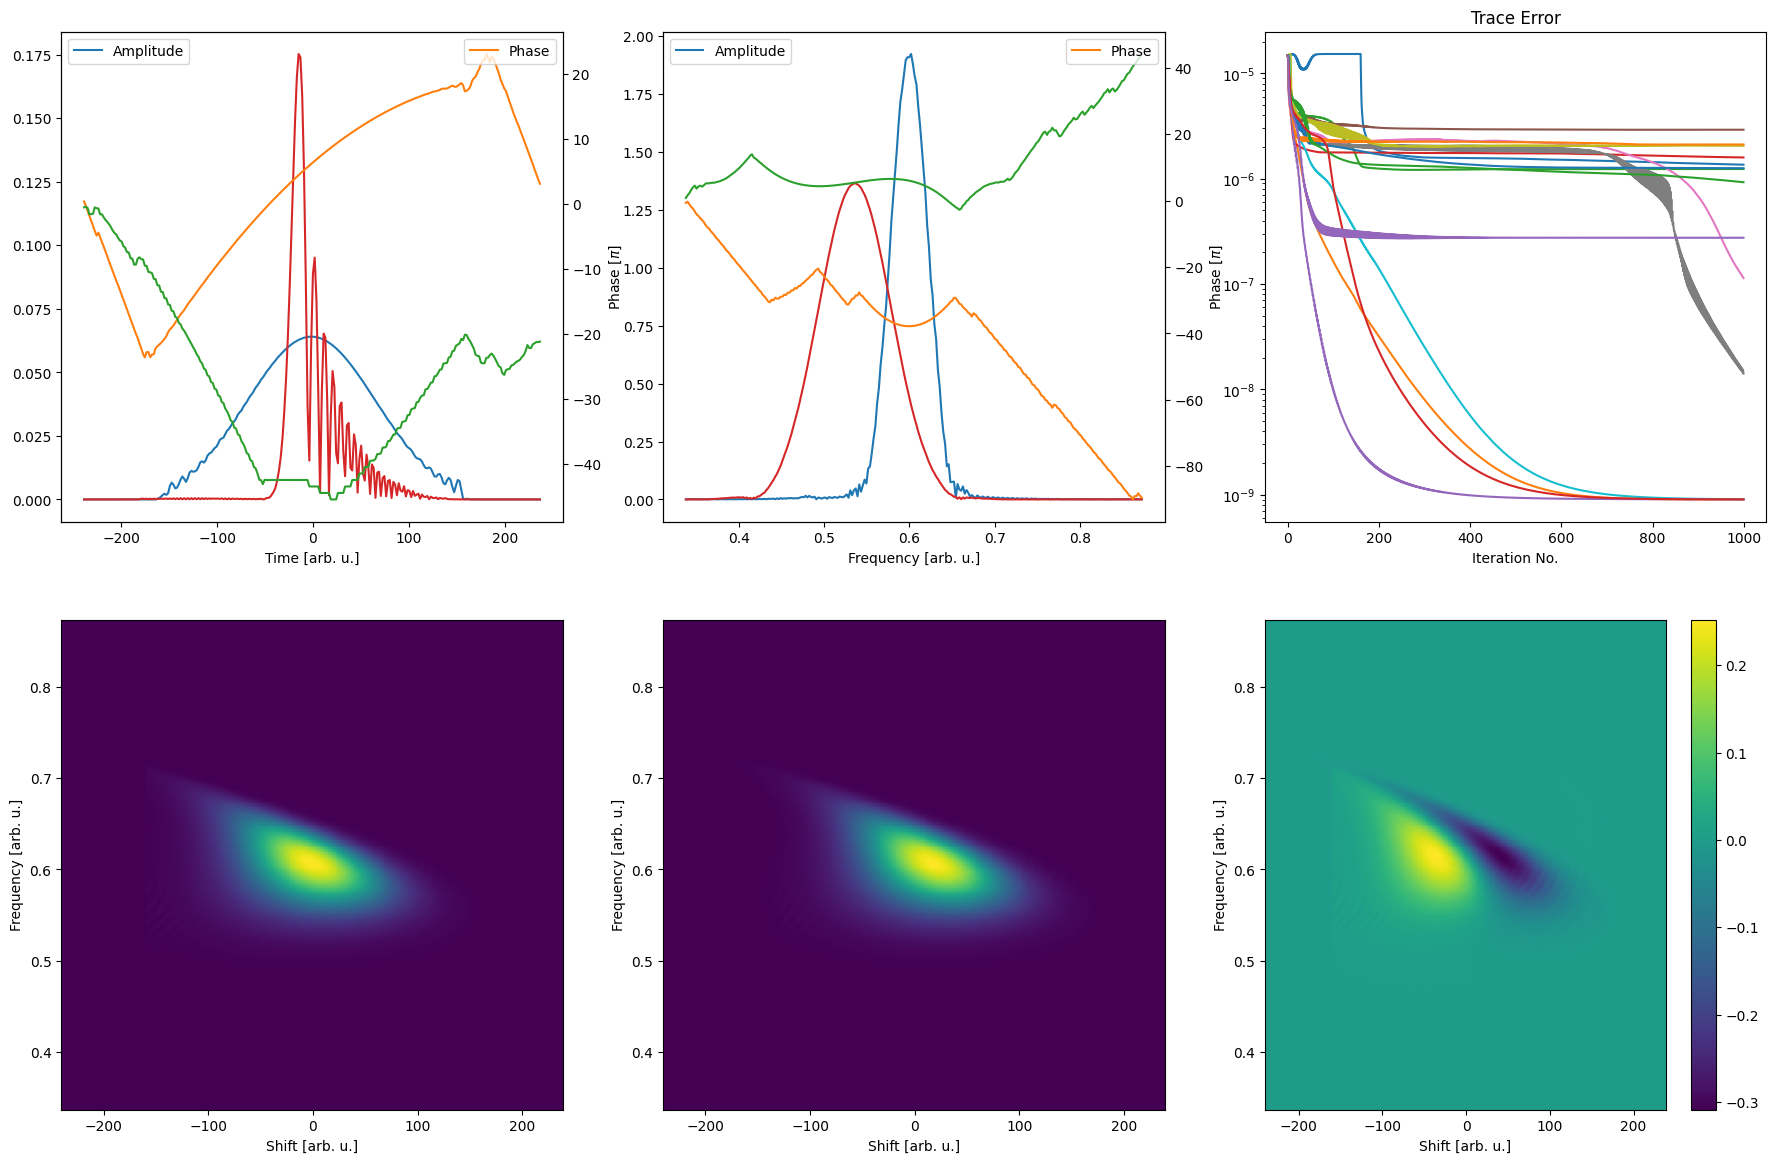

In [ ]:
# vanilla = Vanilla(delay, frequency, trace, "shg", cross_correlation="doubleblind")

# # there is probably some normalization issue here, pulse-norm explodes
# vanilla.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# vanilla.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

# population = vanilla.create_initial_population(5, "random")
# final_result = vanilla.run(population, 100)

# vanilla.plot_results(final_result, doubleblind=True)







# lsgpa = LSGPA(delay, frequency, trace, "shg", cross_correlation="doubleblind")

# # there is probably some normalization issue here?
# lsgpa.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# lsgpa.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

# population = lsgpa.create_initial_population(5, "random")
# final_result = lsgpa.run(population, 1000)

# lsgpa.plot_results(final_result, doubleblind=True)





# pcgpa = CPCGPA(delay, frequency, trace, "shg", cross_correlation="doubleblind")

# pcgpa.constraints=True
# pcgpa.svd=False

# # # needs to be corrected for central frequency
# # pcgpa.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# # pcgpa.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

# population = pcgpa.create_initial_population(15, "random")
# final_result = pcgpa.run(population, 1000)

# pcgpa.plot_results(final_result, doubleblind=True)







# gp = GeneralizedProjection(delay, frequency, trace, "shg", cross_correlation="doubleblind")

# gp.global_gamma = 1e1
# gp.global_adaptive_scaling = "linear"

# # there is probably some normalization issue here?
# gp.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# gp.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

# population = gp.create_initial_population(5, "random")
# final_result = gp.run(population, 150)

# gp.plot_results(final_result, doubleblind=True)







# pie = PtychographicIterativeEngine(delay, frequency, trace, "shg", "rPIE", cross_correlation="doubleblind")

# pie.local_gamma = 1e-1
# pie.global_gamma = 1e-3

# pie.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# pie.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

# population = pie.create_initial_population(5, "random")
# final_result = pie.run(population, 50, 150)

# pie.plot_results(final_result, doubleblind=True)






# copra = COPRA(delay, frequency, trace, "shg", cross_correlation="doubleblind")

# copra.local_gamma=1e-1
# copra.global_gamma=0.25

# # there is probably some normalization issue here?
# copra.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# copra.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

# population = copra.create_initial_population(5, "random")
# final_result = copra.run(population, 50, 500)

# copra.plot_results(final_result, doubleblind=True)